# Decsription

## Dataset is created based on 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored).

## Dataset consists of 393 rows and 20 colums.

## **Purpose of dataset**

## Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption. The data provided is sourced from a Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984.

# Goals and Objectives

1.   Examine thoroughly dataset on cirrhosis patients.
2.   Prepare data (delete nullable values, remove unnecessary columns, remove outliers).
3.   Do exploratory data analysis (histogram, correlation matrix, scatter plots diagram).
4.   Execute machine learning algorithm for data analysis (K-NN method)
5.   Execute Neural Network for data analysis (MPL model with 3 layers, 6 layers)
6.   Make conclusions.

# Import Libraries

In [700]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1
import matplotlib.pyplot as plt

In [701]:
df = pd.read_csv('cirrhosis.csv')

# Examine the data

In [703]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400.0,D,D-penicillamine,21464.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500.0,C,D-penicillamine,20617.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012.0,D,D-penicillamine,25594.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925.0,D,D-penicillamine,19994.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,6,2503.0,D,Placebo,24201.0,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,414,681.0,D,NaN,24472.0,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
389,415,1103.0,C,NaN,14245.0,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
390,416,1055.0,C,NaN,20819.0,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
391,417,691.0,C,NaN,21185.0,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [704]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             393 non-null    object 
 1   N_Days         387 non-null    float64
 2   Status         387 non-null    object 
 3   Drug           293 non-null    object 
 4   Age            387 non-null    float64
 5   Sex            387 non-null    object 
 6   Ascites        293 non-null    object 
 7   Hepatomegaly   293 non-null    object 
 8   Spiders        293 non-null    object 
 9   Edema          387 non-null    object 
 10  Bilirubin      387 non-null    float64
 11  Cholesterol    266 non-null    float64
 12  Albumin        387 non-null    float64
 13  Copper         291 non-null    float64
 14  Alk_Phos       293 non-null    float64
 15  SGOT           293 non-null    float64
 16  Tryglicerides  264 non-null    float64
 17  Platelets      376 non-null    float64
 18  Prothrombi

In [705]:
df.isnull().sum()

ID                 0
N_Days             6
Status             6
Drug             100
Age                6
Sex                6
Ascites          100
Hepatomegaly     100
Spiders          100
Edema              6
Bilirubin          6
Cholesterol      127
Albumin            6
Copper           102
Alk_Phos         100
SGOT             100
Tryglicerides    129
Platelets         17
Prothrombin        8
Stage              6
dtype: int64

## Look at target variable to see what values it holds

In [706]:
df['Status'].unique()

array(['D', 'C', nan], dtype=object)

## Delete all nullable values and also columns Age, ID, and Ascities as the data they provide is not needed for further actions

In [707]:
df = df.dropna()
df = df.drop(['Age','ID', 'Ascites'],axis = 1)

## Make column State type int as it contains whole numbers

In [708]:
df['Stage'] = df['Stage'].astype(int)

## Encode colums Status, Drug, Sex, Hepatomegaly, Spiders, Ediema, and Stage to convert the values to numeric

In [709]:
def encode_categorical_columns(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

columns_to_encode = ['Status', 'Drug', 'Sex', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
df = encode_categorical_columns(df, columns_to_encode)

In [710]:
df.head()

,N_Days,Status,Drug,Sex,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400.0,1,0,0,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,3
1,4500.0,0,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,2
2,1012.0,1,0,1,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,3
3,1925.0,1,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,3
5,1832.0,0,1,0,1,0,0,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,2


In [711]:
print(df.describe())

            N_Days      Status        Drug         Sex  Hepatomegaly  \
count   258.000000  258.000000  258.000000  258.000000    258.000000   
mean   2011.786822    0.430233    0.507752    0.120155      0.503876   
std    1126.955993    0.496071    0.500912    0.325775      0.500957   
min      41.000000    0.000000    0.000000    0.000000      0.000000   
25%    1216.000000    0.000000    0.000000    0.000000      0.000000   
50%    1829.000000    0.000000    1.000000    0.000000      1.000000   
75%    2771.250000    1.000000    1.000000    0.000000      1.000000   
max    4556.000000    1.000000    1.000000    1.000000      1.000000   

          Spiders       Edema   Bilirubin  Cholesterol     Albumin  \
count  258.000000  258.000000  258.000000   258.000000  258.000000   
mean     0.290698    0.220930    3.341860   366.500000    3.511434   
std      0.454967    0.552345    4.730145   226.252884    0.407346   
min      0.000000    0.000000    0.300000   120.000000    1.960000   
2

## Identify and remove outliers using Z-Score

In [712]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
# Remove outliers using z-score
z_scores = np.abs((df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std())
df = df[(z_scores < 3).all(axis=1)]


In [713]:
print(df.describe())

            N_Days      Status        Drug         Sex  Hepatomegaly  \
count   213.000000  213.000000  213.000000  213.000000    213.000000   
mean   2129.507042    0.347418    0.502347    0.122066      0.464789   
std    1071.541169    0.477272    0.501172    0.328133      0.499934   
min      71.000000    0.000000    0.000000    0.000000      0.000000   
25%    1321.000000    0.000000    0.000000    0.000000      0.000000   
50%    1967.000000    0.000000    1.000000    0.000000      0.000000   
75%    2835.000000    1.000000    1.000000    0.000000      1.000000   
max    4556.000000    1.000000    1.000000    1.000000      1.000000   

          Spiders       Edema   Bilirubin  Cholesterol     Albumin  \
count  213.000000  213.000000  213.000000   213.000000  213.000000   
mean     0.234742    0.079812    2.214085   337.436620    3.572958   
std      0.424836    0.271641    2.504616   141.474152    0.353592   
min      0.000000    0.000000    0.300000   120.000000    2.540000   
2

# Histogram

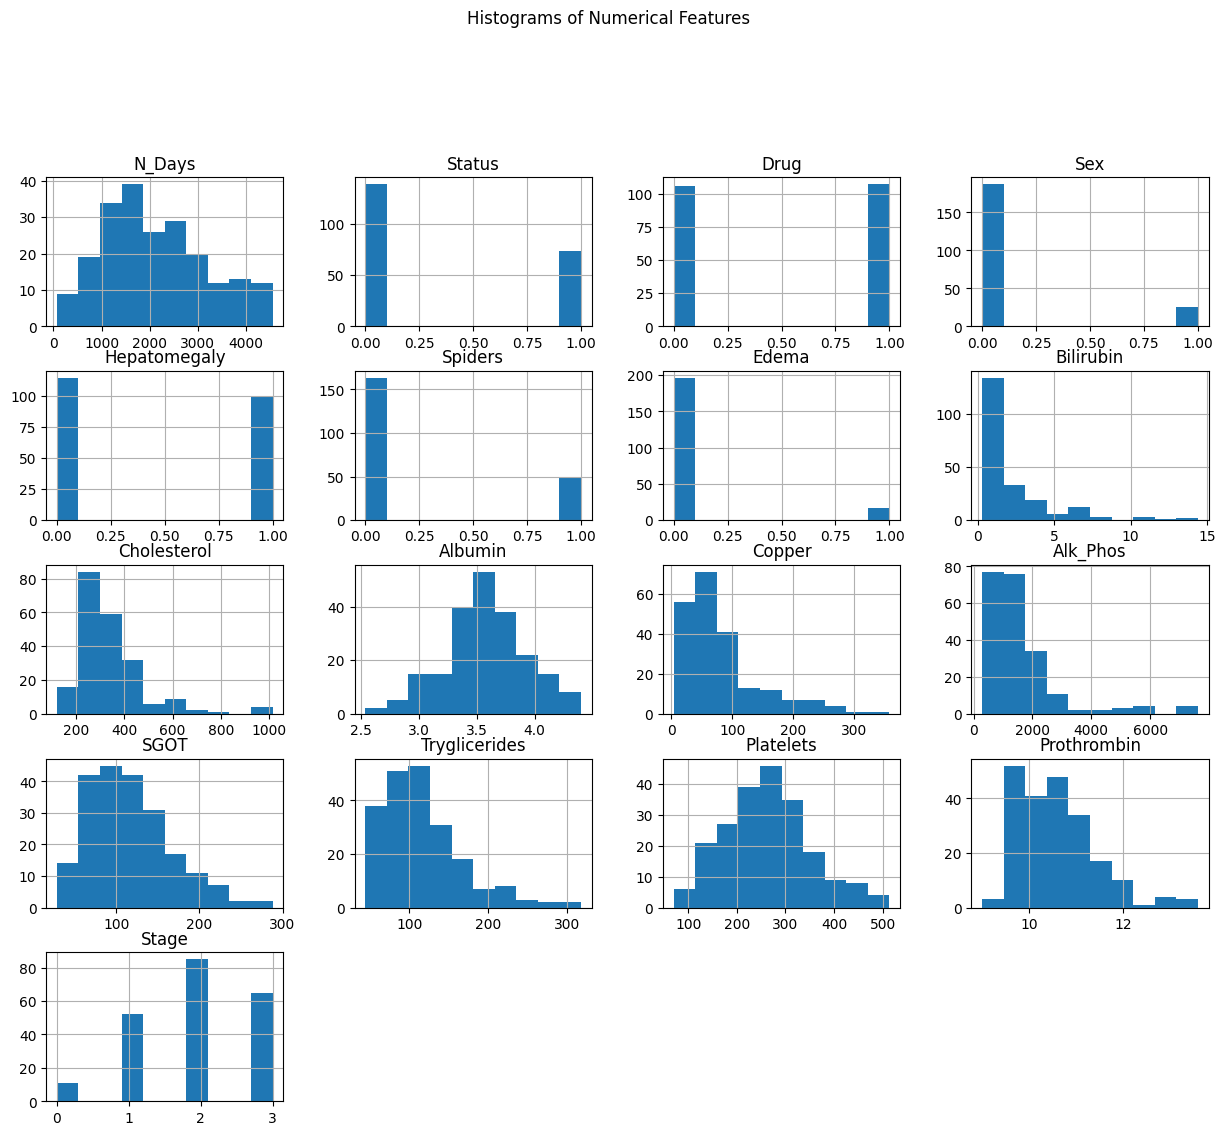

In [714]:
df.hist(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

# Correlation Matrix

Text(0.5, 1.02, 'Correlation Matrix')

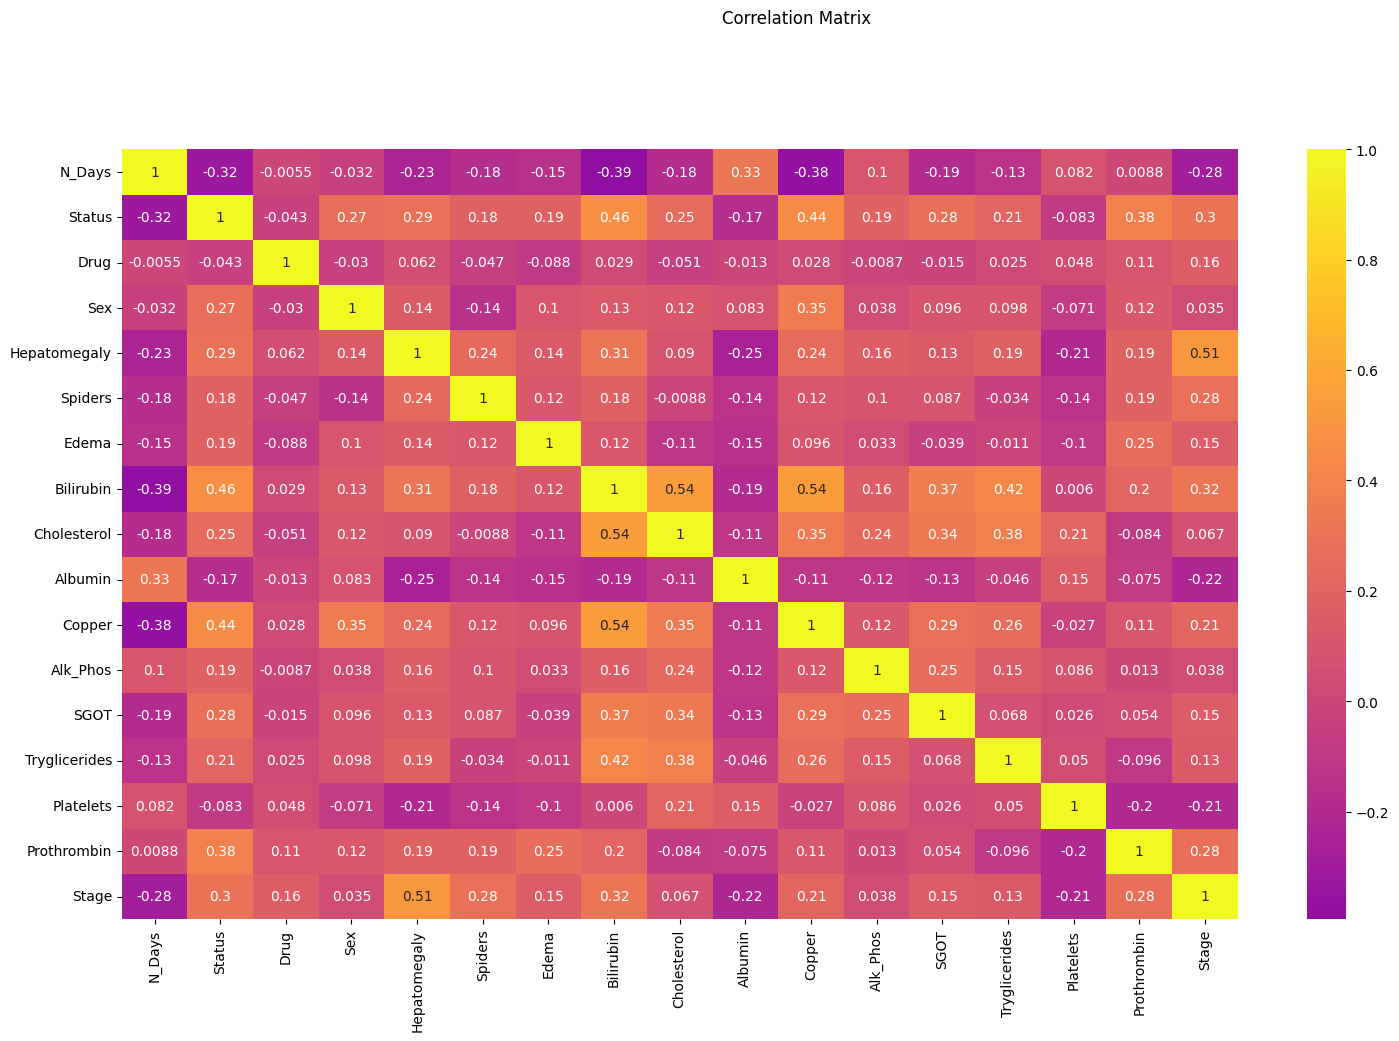

In [768]:
corr_matrix=df.corr()
plt.figure(1, figsize=(18,10))
sns.heatmap(corr_matrix, cmap='plasma', center=0, annot=True)
plt.suptitle('Correlation Matrix', y=1.02)

# Scatter plots

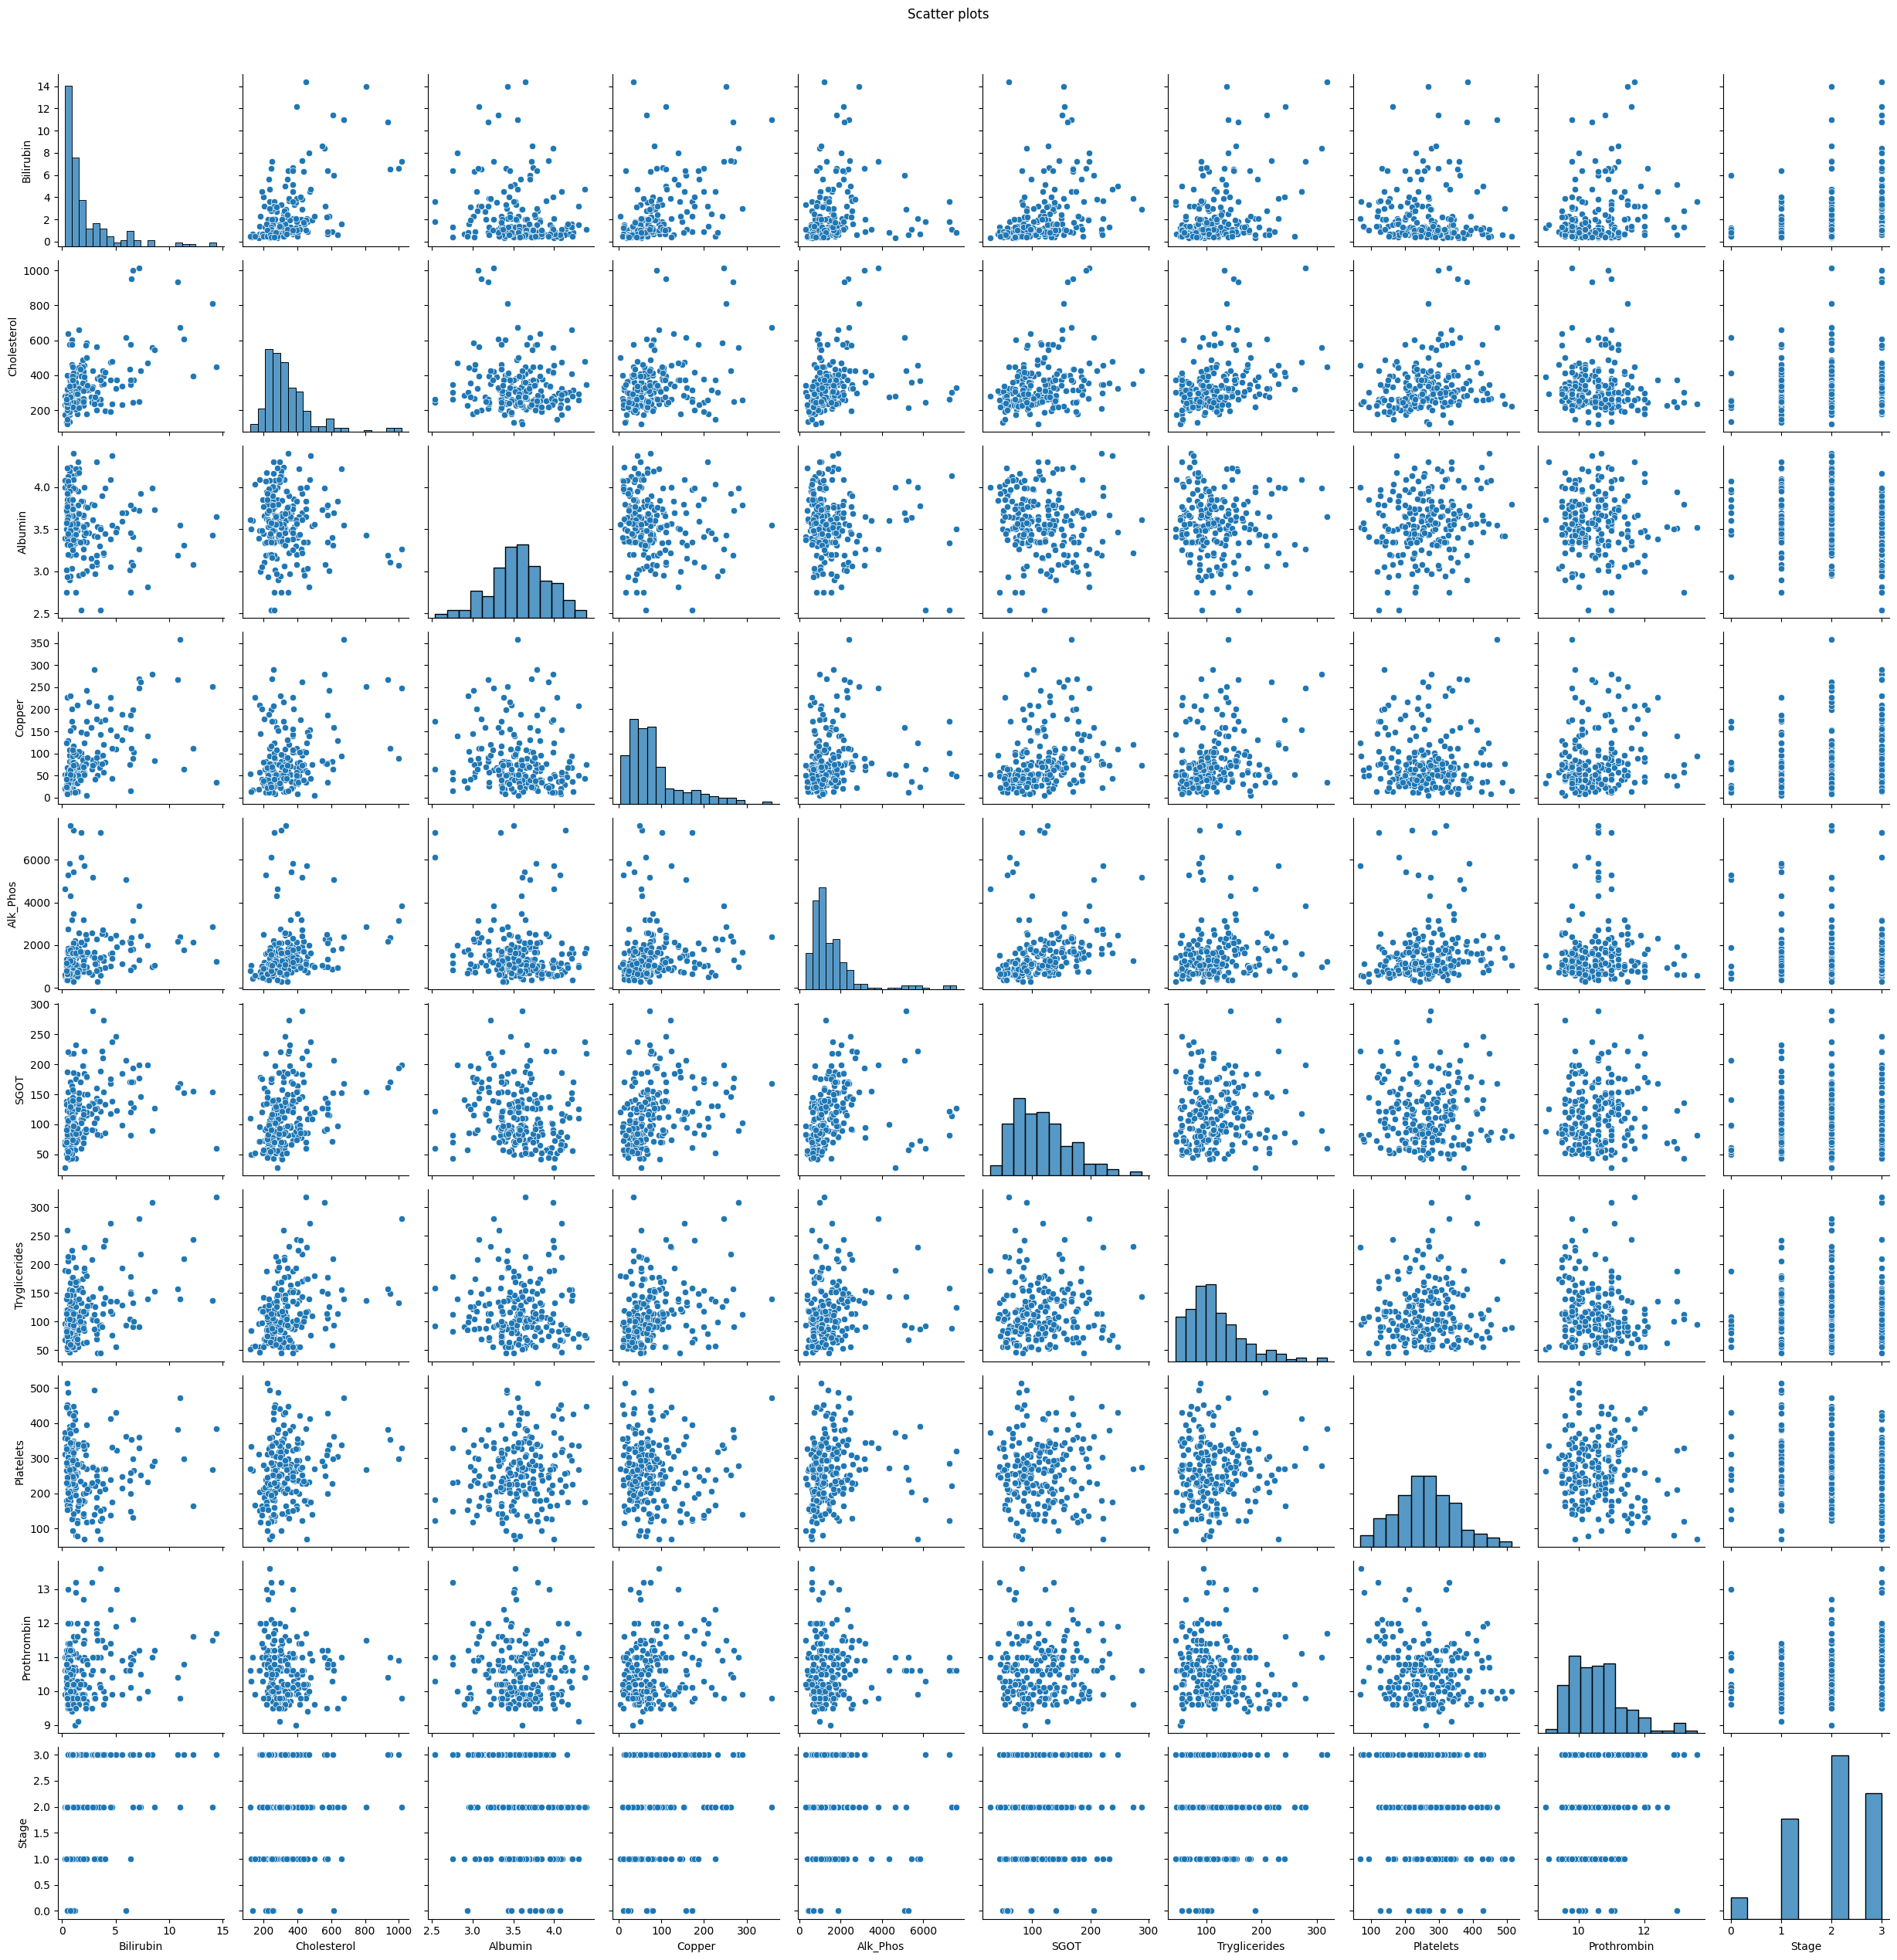

In [716]:
relevant_columns = df[['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']]

sns.pairplot(relevant_columns)
plt.suptitle('Scatter plots', y=1.02)
plt.show()

# Process data

In [728]:
scaler = preprocessing.StandardScaler()
X = df.drop(columns = 'Status').values
X = scaler.fit_transform(X)
y = df['Status'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
normalized_x_train = scaler.fit_transform(X_train)
normalized_x_test = scaler.transform(X_test)

(170, 16) (43, 16) (170, 1) (43, 1)


## Choose K-NN method for data analysis

In [741]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
n_neighbors = [3, 5, 7, 9, 11]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

params_knn = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm}

# Create KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV object for KNN
knn_grid = GridSearchCV(estimator=knn, param_grid=params_knn, refit=True, verbose=0, n_jobs=-1)

# Fit the model to the training data
knn_grid.fit(X_train, y_train.ravel())

print(f"Best parameters for KNN: {knn_grid.best_params_}")
print(f"Best score for KNN: {knn_grid.best_score_}")


Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}
Best score for KNN: 0.7470588235294118


## Create KNN classifier train the model. Best number of neighbors is found in the grid search

In [748]:
k_value = 11
knn_classifier = KNeighborsClassifier(n_neighbors=k_value, weights='uniform', algorithm='auto')
knn_classifier.fit(X_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=11)

In [749]:
y_pred = knn_classifier.predict(X_test)


## Calculate accuracy

In [750]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 83.72%


In [751]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.75      0.55      0.63        11

    accuracy                           0.84        43
   macro avg       0.80      0.74      0.76        43
weighted avg       0.83      0.84      0.83        43



In [752]:
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[30  2]
 [ 5  6]]


# Neural Networks

## Create MPL model with 3 layers (2 hidden)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 64)                1088      
                                                                 
 dropout_58 (Dropout)        (None, 64)                0         
                                                                 
 hidden_layer2 (Dense)       (None, 32)                2080      
                                                                 
 dropout_59 (Dropout)        (None, 32)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Test loss: 0.496624

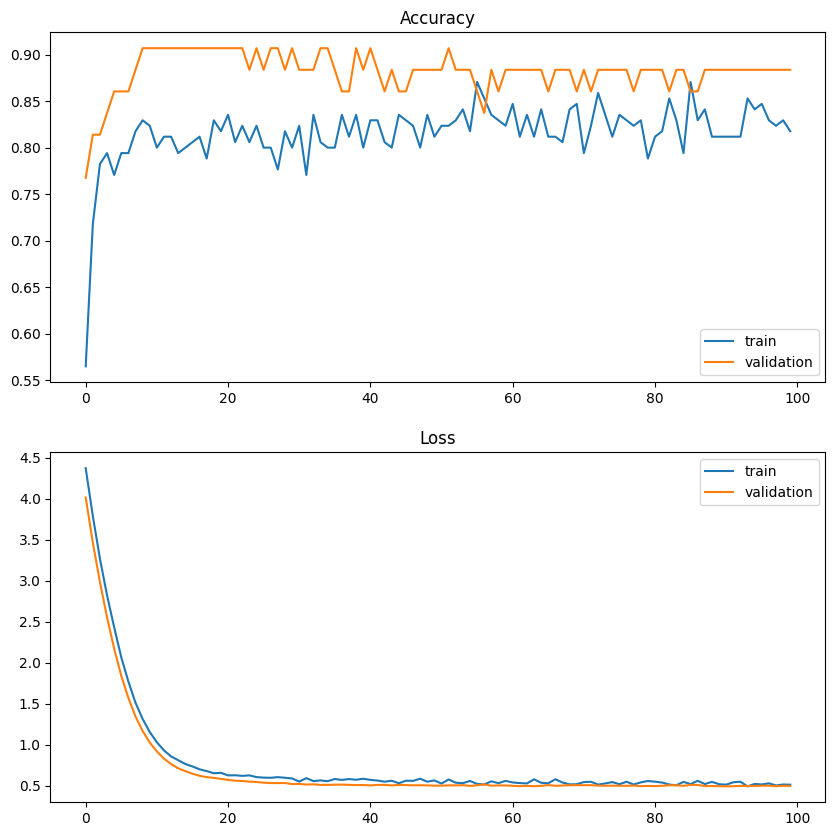

In [759]:
np.random.seed(42)

#Create MLP with 3 layers with different number of neuron, ReLU activation, and L1 regularization
model = Sequential()
model.add(InputLayer(input_shape=normalized_x_train[0].shape))
model.add(Dense(64, activation="relu", kernel_regularizer=l1(0.01), name="hidden_layer1"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu", kernel_regularizer=l1(0.01), name="hidden_layer2"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid", name="output_layer"))
# sigmoid is used becuase i have 2 classes

model.summary()

recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

# Compile the model with Adam optimizer, binary crossentropy loss, and metrics for evaluation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall])
# binarycrossentropy is used because it is optimal for classification with 2 classes

history = model.fit(normalized_x_train, y_train,
                    epochs=100,
                    batch_size=5,
                    verbose=0,
                    validation_data=(normalized_x_test, y_test))
# Train the model
history.history.keys()

score = model.evaluate(normalized_x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax1.plot(train_accuracy, label='train')
ax1.plot(val_accuracy, label='validation')
ax1.set_title("Accuracy")

ax2.plot(train_loss, label='train')
ax2.plot(val_loss, label='validation')
ax2.set_title("Loss")

ax1.legend()
ax2.legend()
plt.show()


## Create MPL model with 6 layers (5 hidden)

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer2 (Dense)       (None, 512)               8704      
                                                                 
 batch_normalization_54 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dropout_83 (Dropout)        (None, 512)               0         
                                                                 
 hidden_layer3 (Dense)       (None, 256)               131328    
                                                                 
 batch_normalization_55 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_84 (Dropout)        (None, 256)             

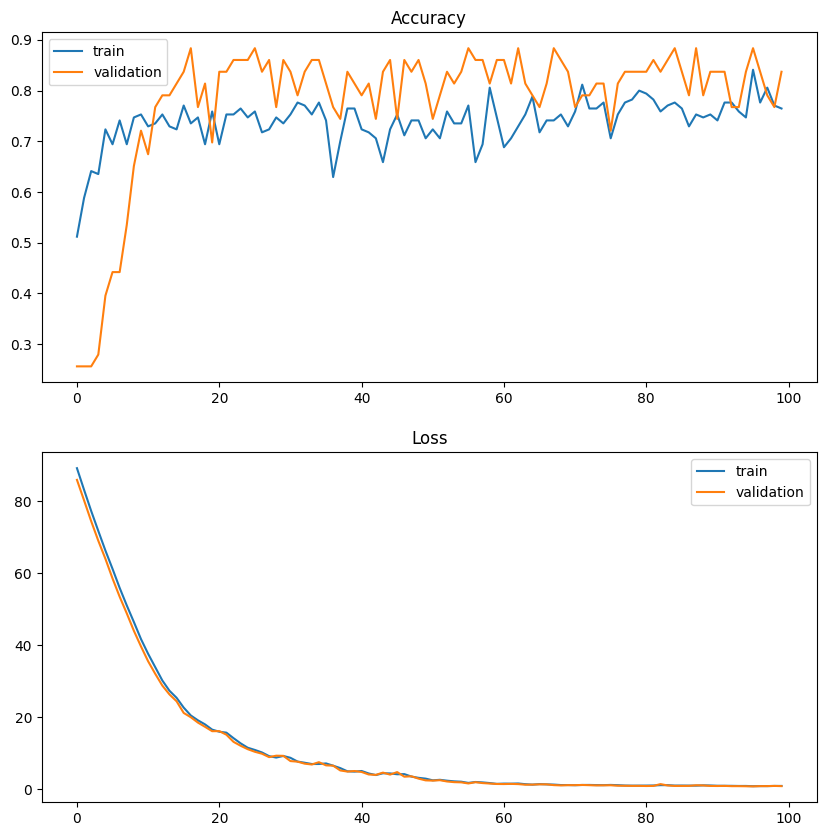

In [766]:
np.random.seed(42)

#Create MLP with 6 layers with different number of neuron, ReLU activation, and L1 regularization
model1 = Sequential()
model1.add(InputLayer(input_shape=normalized_x_train[0].shape))
model1.add(Dense(512, activation="relu", kernel_regularizer=l1(0.01), name="hidden_layer1"))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(256, activation="relu", kernel_regularizer=l1(0.01), name="hidden_layer2"))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(128, activation="relu", kernel_regularizer=l1(0.01), name="hidden_layer3"))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(64, activation="relu", kernel_regularizer=l1(0.01), name="hidden_layer4"))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(32, activation="relu", kernel_regularizer=l1(0.01), name="hidden_layer5"))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
# Output layer with sigmoid activation for binary classification
model1.add(Dense(1, activation="sigmoid", name="output_layer"))

model1.summary()

recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

# Compile the model with Adam optimizer, binary crossentropy loss, and metrics for evaluation
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall])

# Train the model
history1 = model1.fit(normalized_x_train, y_train,
                    epochs=100,
                    batch_size=5,
                    verbose=0,
                    validation_data=(normalized_x_test, y_test))

history1.history.keys()

score = model1.evaluate(normalized_x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

train_accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

ax1.plot(train_accuracy, label='train')
ax1.plot(val_accuracy, label='validation')
ax1.set_title("Accuracy")

ax2.plot(train_loss, label='train')
ax2.plot(val_loss, label='validation')
ax2.set_title("Loss")

ax1.legend()
ax2.legend()
plt.show()

# Conclusions

## During the work done on this dataset, firstly I came to realization that there are nullable values that I don’t need for my work so they had to be removed, as well as some unnecessary columns. Then I identified outliers and removed them from dataset making it clearer for further research and work. I flawlessly performed 3 different data exploratory analysis technics by creating histogram of data, correlation matrix and scatter plots diagram. After that during my work I had to do machine learning algorithm for data analysis. That I decided to train machine by using K-NN model. I found what number of neighbors was optimal for executing it and later created classification report as well as confusion matrix. I also calculated accuracy which was approximately equal to 83.72%. For the final part of my work I learned how to use Two Multilayer Perceptron models with different architecture. Model one consisted of 3 layers, 2 of which were hidden and second model consisted of 6 layers, 5 of which were hidden. First model achieved results of having test accuracy of approximately 88% and loss of approximately of 49%. Whereas second model had accuracy of approximately 83% and loss approximately of 80%. Further training would definitely result in improvement of results. Yet I am satisfied with the work done.